Trong phần này, ta sẽ thực hiện các bước xử lý dữ liệu trước khi áp dụng các mô hình thích hợp

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Chúng ta xem tuổi thọ 'life' ở các khu vực 'Region'

<AxesSubplot:title={'center':'life'}, xlabel='Region'>

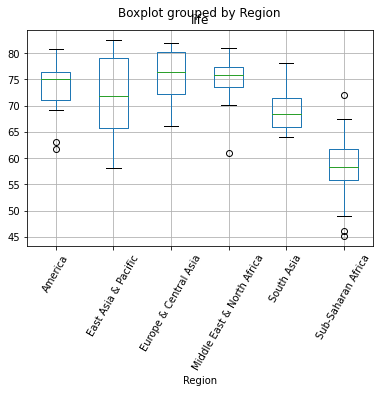

In [6]:
df.boxplot('life', 'Region', rot=60)

In [7]:
df_region = pd.get_dummies(df)
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


Nếu muốn loại bỏ thành phần đầu, ta sử dụng: pd.get_dummies(df, drop_first = True)

In [10]:
df_region1 = pd.get_dummies(df, drop_first = True)
df_region1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [13]:
X = df_region.drop('life', axis =1)
y = df_region['life'].values
print(X.shape, y.shape)

(139, 14) (139,)


Ta áp dung mô hình Ridge (L2) với alpha =0.5

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 0.5, normalize = True)
ridge_cv = cross_val_score(ridge, X, y, cv =5)
print(ridge_cv)

[0.87032259 0.80383219 0.83638426 0.77857442 0.87021336]


Chúng ta xem dữ liệu vote, và xử lý dữ liệu này  
Tham khảo: https://datahub.io/machine-learning/vote

In [19]:
dfvote = pd.read_csv('vote_csv.csv')
print(dfvote.shape)
dfvote.head()

(435, 17)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [21]:
print(dfvote.isnull().sum())

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
Class                                       0
dtype: int64


Ta thấy dữ liệu có NaN, ta sẽ loại bỏ nó như dưới đây. Nếu dữ liệu có NaN ta dễ dàng dropna, fillna,...Nếu các ký tự đặc biệt, ta phải chuyển sang NaN. Ví dụ chuyển '?' thánh NaN, ta làm như sau: df[df == '?'| = np.nan

In [18]:
dfvote = dfvote.dropna() #loại bỏ những thành phần có NaN
dfvote.shape

(232, 17)

SimpleImputer để chuyển các giá trị NaN thành giá trị trung bình mean, giá trị xuất hiện nhiều most_frequent

In [40]:
from sklearn.impute import SimpleImputer

dfvote = pd.read_csv('vote_csv.csv')
dfvote[dfvote == 'y'] = 1
dfvote[dfvote == 'n'] = 0

X = dfvote.drop('Class', axis = 1)
imp = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
imp.fit(X)
X = imp.transform(X)
print(X.shape)

y = dfvote['Class']
y = pd.get_dummies(y, drop_first = True)
print(y.shape)

(435, 16)
(435, 1)


Ta sử dụng pipeline bằng cách gộp các bước để xây dựng mô hình --> Imputer để xử lý NaN và SVC (máy vector hỗ trợ) để dự đoán. 
Xem thêm [SVC](https://scikit-learn.org/stable/modules/svm.html)

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
imp = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
clf = SVC()
steps = [('imputation', imp), ('SVM', clf)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131

C:\Users\Laptop88\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Scale data và Normalize data   
Ta sẽ sử dụng Standardization: trừ giá trị trung bình và chia cho phương sai

In [51]:
dfww = pd.read_csv('winequality-white.csv',delimiter=';')
X = dfww.drop('quality', axis = 1).values
y = dfww['quality'].values
dfww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.759983365007494e-15
Standard Deviation of Scaled Features: 0.9999999999999999


pipeline scale và Knn

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]      
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


pipeline scale và SVC, kết hợp lựa chọn siêu tham số GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21)

cv = GridSearchCV(pipeline, parameters, cv=3)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6081632653061224
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.24      0.39      0.30        28
           5       0.61      0.62      0.61       289
           6       0.66      0.66      0.66       447
           7       0.62      0.54      0.58       177
           8       0.47      0.42      0.44        38

    accuracy                           0.61       980
   macro avg       0.43      0.44      0.43       980
weighted avg       0.61      0.61      0.61       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
